# Fanal

## A neutrino-less beta decay experiment 

## An open exercise

## Signal Estimation from data 

### USC, Master de Física, Física de Partícula II


J. A. Hernando-Morata, with the help of J. Muñoz, J. M. Benlloch, B. Palmeiro, G. Díaz

February 2021


In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

#### Importing modules

In [2]:
import numpy  as np
import tables as tb
import pandas as pd
import matplotlib.pyplot as plt

import scipy.constants as constants
import scipy.stats     as stats
import scipy.optimize  as optimize

import warnings
warnings.filterwarnings('ignore')

In [3]:
# REMEMBER TO ADD THE FOLDER TO PYTHONPATH
import os
import sys
dirpath = os.getcwd()[:-9]
print('add path to PYTHONPATH : ', dirpath)
sys.path.insert(0, os.path.abspath(dirpath))

add path to PYTHONPATH :  /Users/hernando/docencia/master/Fisica_Particulas/USC-Fanal


In [4]:
import core.pltext as pltext
#import hipy.efit   as efit
import core.utils  as ut

import ana.fanal  as fn

pltext.style()

## Indications

### Goal

  **Estimate the number of signal events in data. Estimate the half-life value**.

### Indications

   * Get the data
   
   * Estimate the number of signal events (with the method validated in the previous notebook)
   
   * Measure the half-life.
   
   * Estimate also the uncertainties.


## Access the data

In [5]:
#dirpath = '/Users/hernando/docencia/master/Fisica_Particulas/USC-Fanal/data/'

In [6]:
filename = '/data/alpha.h5'
print('Data : ', dirpath + filename)

mcbi = pd.read_hdf(dirpath + filename, key = 'mc/bi214')
mctl = pd.read_hdf(dirpath + filename, key = 'mc/tl208')
mcbb = pd.read_hdf(dirpath + filename, key = 'mc/bb0nu')

datab = pd.read_hdf(dirpath + filename, key = 'data/blind')
datar = pd.read_hdf(dirpath + filename, key = 'data/roi')
data  = pd.concat((datab, datar)) # concatenate blind and roi-data into one data DF


Data :  /Users/hernando/docencia/master/Fisica_Particulas/USC-Fanal/data/alpha.h5


In [7]:
samples  = ['bb0nu', 'Bi', 'Tl']
ssamples = [r'$\beta\beta0\nu$', r'$^{214}$Bi', r'$^{208}$Tl']
mcs      = [mcbb, mcbi, mctl]

In [8]:
erange     = (2.400, 2.650)
varnames   = ['E', 'num_tracks', 'blob2_E']
varranges  = [erange, (1., 1.1), (0.4, np.inf)]

## Estimate the number of signal events

### Estimate the number of expected events

In [9]:
def nevents(nbb_roi, nbi, ntl, eff_bb_roi = 0.41098):
    nevts  = [nbb_roi/eff_bb_roi, nbi, ntl]
    return nevts

nbb_roi = 10    # guess
nbi     = 1424. # 5772. # From previos NB
ntl     = 1943. #8230. # From previos NB
nevts   = nevents(nbb_roi, nbi, ntl)
print(nevts)

[24.332084286339967, 1424.0, 1943.0]


## Inspect the variables

In [10]:
#pltext.df_inspect(exp, ncolumns = 3)

## Estimate the number of events

estimated events :  13.19,  24.21,  11.60,
expected  events :  12.92,  25.11,  14.77,


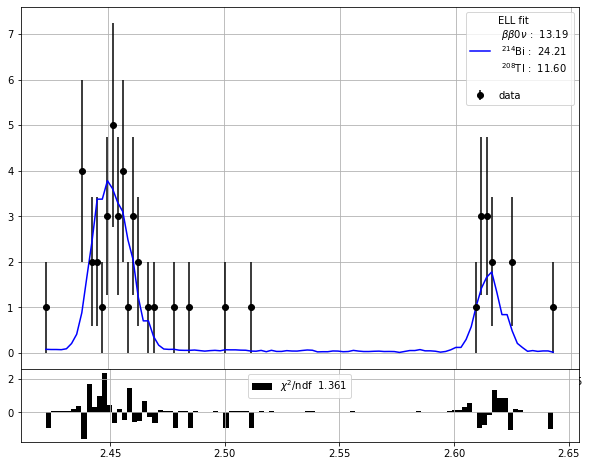

In [11]:
result, ene, ell, effs = fn.ana_experiment(data, mcs, nevts, level_data = 2)
ns_est  = result.x
ns_exp = [ni * eff[0] for ni, eff in zip(nevts, effs)]
print('estimated events :', *['{:6.2f},'.format(ni) for ni in ns_est])
print('expected  events :', *['{:6.2f},'.format(ni) for ni in ns_exp])

fn.plot_fit_ell(ene, ns_est, ell.pdf)

## Estimate the half-time

In [12]:
erange     = (2.400, 2.650)
eroi       = (2.440, 2.475)
keys       = ['E', 'num_tracks', 'blob2_E', 'RoI']
varnames   = ['E', 'num_tracks', 'blob2_E', 'E']
varranges  = [erange, (1., 1.1), (0.4, np.inf), eroi]

exposure   = 500 # kg y
# get the final selection
sel        = ut.selections(mcbb, varnames, varranges)[-1] 
# comptue the efficiency
eff, ueff  = ut.efficiency(sel) 

nbb = 13.19
tau  = fn.half_life(nbb, exposure, eff)

print('number of bb0nu events : ', nbb)
print('exposure               : ', exposure, ' kg y')
print('signal efficiency      : {:6.3f} +- {:6.3f}'.format(eff, ueff))
print('bb0nu half-life        :  {:6.2e} y '.format(tau))
#TODO: uncertainties

number of bb0nu events :  13.19
exposure               :  500  kg y
signal efficiency      :  0.530 +-  0.002
bb0nu half-life        :  4.94e+25 y 
